### i. function for autoreload

In [1]:
%load_ext autoreload
%autoreload 2

### ii. disable all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### The first thing we'll need to do is load in the libraries and datasets we'll be using.

### iii. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

### 1.  Reading data from file

In [4]:
cruise1 = pd.read_csv("cruise_ship_info.csv")

cruise1["Ship_name"] = cruise1["Ship_name"].astype("category")
cruise1["Cruise_line"] = cruise1["Cruise_line"].astype("category")

cruise1

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


### 1.1. checking for columns in the dataset

In [5]:
cruise1.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

### 1.2 Checking for missing values 

In [6]:
cruise1.isna().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

### 2. Getting the statistics 

In [7]:
cruise1.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


##### The count is the total number rows in our dataset which is 158,
##### The mean measures the average of all columns for example the minimum number of passengers in any ship is 18 and the maximum number is 54
##### the Standard deviation is 7.615691 which shows how spread the dataset.
##### 25%, 50%, and 75% shows the IQR which from the above show that our dataset is normally distributed meaning the values is not far away from the middle. 
##### min tell us the minimum value in each column
##### max show the maximum value of each column 

### 2.1 Plot the distibution for each column

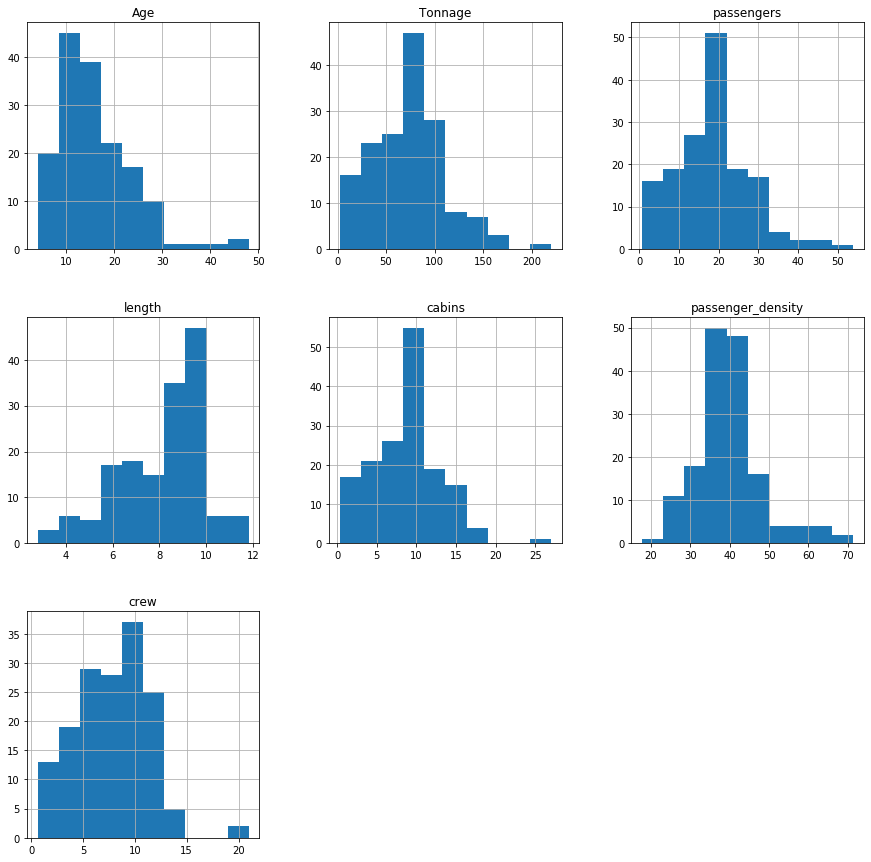

In [8]:
cruise1.hist(figsize=(15,15))
plt.show()

#### From the above distribution cabins, passengers, crew, Tonnage and passenger density are normally distributed, that is there are neither skwed to the left nor skwed to the right but Age, length, are not properly distributed which as a result we have to normalized the dataset.   

### 3.2 probabilities distributions of age

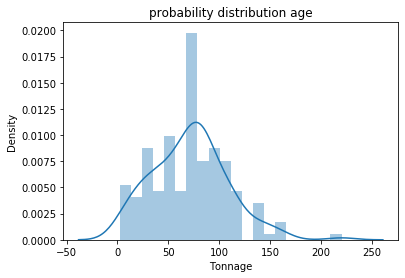

In [9]:
sns.distplot(cruise1['Tonnage'],bins=20)
plt.title('probability distribution age')
plt.show()

#### From the distribution we can say that the Tonnage is normally distributed given that it is neither skwed to the left nor skwed to the right.

### 3.3 probabilities distributions of cabins

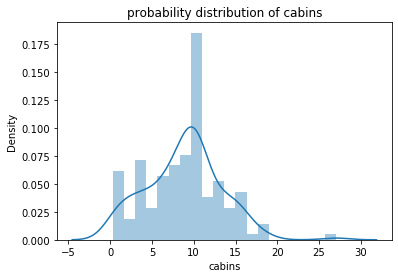

In [10]:
sns.distplot(cruise1['cabins'],bins=20)
plt.title('probability distribution of cabins')
plt.show()

##### From the distribution we can say that the cabins is normally distributed

### 3.4 Standardization of dataset

In [11]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
normalization = StandardScaler()
normal = normalization.fit_transform(cruise1[cols].values)

In [12]:
normal_df = pd.DataFrame(normal, columns=cols)
normal_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


### 3.5 Distribution before normalization

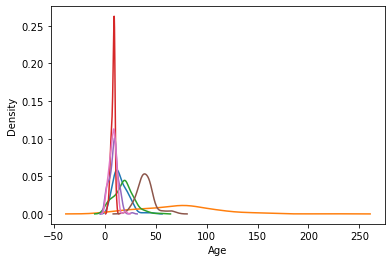

In [13]:
for col in cols:
    sns.kdeplot(cruise1[col])

#### From the graph distribution we can see that the dataset are not normalized so in this case we transform all variables in the data to a specific range in other for our model to be able to learn properly.

### 3.6 Distribution after normalization

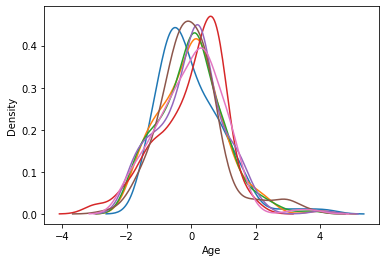

In [14]:
for col in cols:
    sns.kdeplot(normal_df[col])

## 3.7. Covariance 

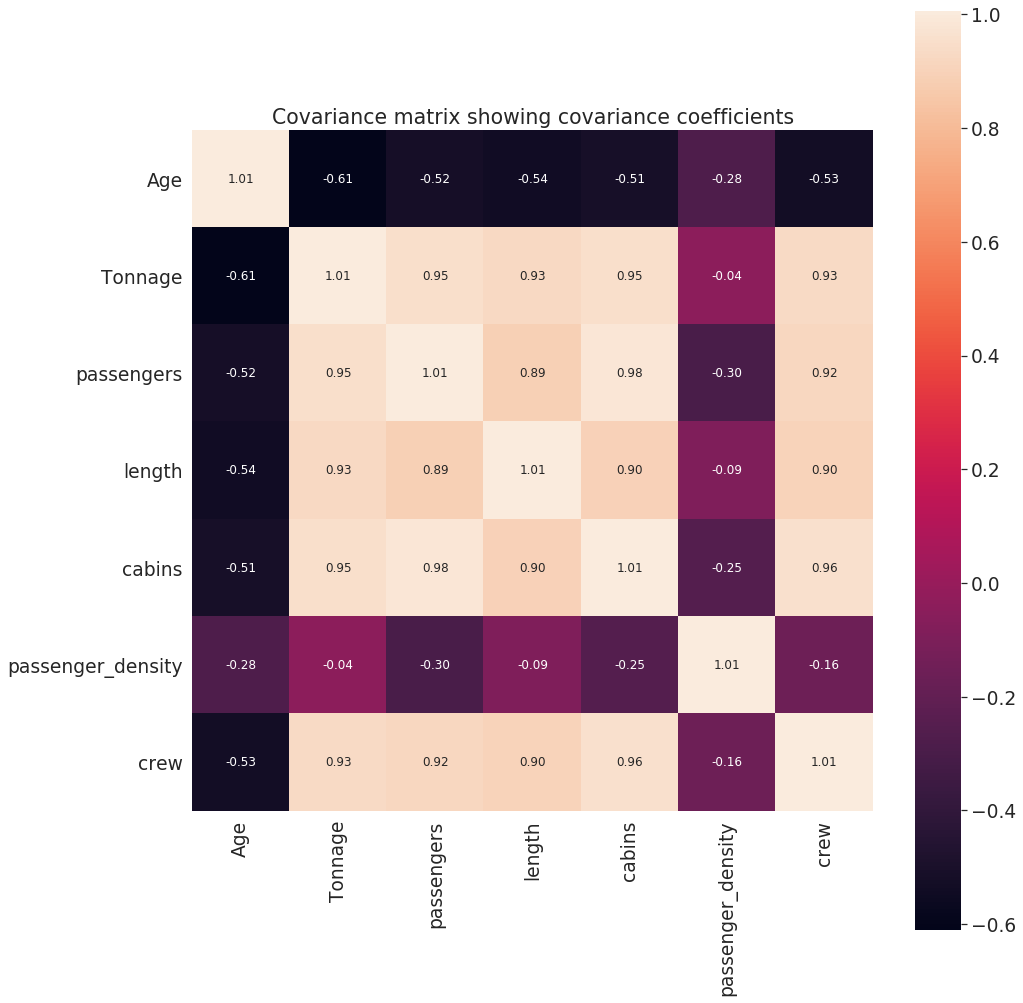

In [15]:
cov_mat =np.cov(normal.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.7)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing covariance coefficients')
plt.tight_layout()
plt.show()

#### Covariance measures the total variation of two random variables from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship)

### 3.8 finding the correlation between features

In [16]:
cruise1.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


#### the above table shows the correlation or describe the linear relationship between the continuous variables in our datasets.

#                         Analysis of Covariance Heatmap and Correlation table
#### From the correlation/covariance above we are checking for the relationship between crew variable which is the predictor against other independent variables. From both the corr and the cov we see that four(4) independent variables have a strong variance and correlation with the predictors variables which are:
##### A. Tonnage
##### B. passengers
##### C. length
##### D. Cabins

####  The other two(2) variables that is:
##### A. Age
##### B. passenger_density
##### Have negative correlation and covariance with the Crew(predictor) variables so in that case we are droping those two columns since there both have negavtive relationship with the prediction variabe. That is there can be able to predict the crew size in the model.

### 3.9. Important columns

In [17]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins']

In [18]:
cruise1[cols_selected].head(5)

,Tonnage,passengers,length,cabins
0,30.277,6.94,5.94,3.55
1,30.277,6.94,5.94,3.55
2,47.262,14.86,7.22,7.43
3,110.000,29.74,9.53,14.88
4,101.353,26.42,8.92,13.21


#### From the correlation table  and covariance heatmap we are able to deduce that the columns in the table above are important for building our models because of the high correlation there have with predictor.

### 4. Performing One Hot Encoding

In [19]:
cruise2 = pd.get_dummies(cruise1[['Ship_name', 'Cruise_line', 'Tonnage', 'passengers', 'length', 'cabins']])
cruise2.head()

,Tonnage,passengers,length,cabins,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,Ship_name_Aries,Ship_name_Armonia,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,30.277,6.94,5.94,3.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.000,29.74,9.53,14.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### In other to build a more simplified regression model, we focus on ordinal features meaning we are only using the four(4) ordinal features in our data set which are "Tonnage", "passengers", "length", "cabins"

### 5. Assigning variables to X and Y

In [20]:
X = cruise1[cols_selected].values

y = cruise1['crew'].values

### 5.1 Checking for the shape of our dataset

In [21]:
X.shape

(158, 4)

In [22]:
y.shape

(158,)

### 5.2 Creating train, test, dataset 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.60, random_state = 40)

### 6. Building the Linear regression Machine Learning model

In [24]:
linear_model = LinearRegression()

model = linear_model.fit(X_train, y_train) ## fitting train set into model

y_train_predict = model.predict(X_train) ## predicting X train variables
y_test_predict = model.predict(X_test) ## predicting X test variables

### 6.1 Graph to show the rate at which the training set can be able to predict the test set variables

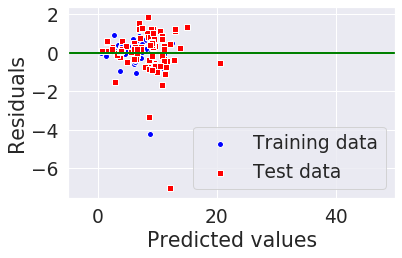

In [25]:
plt.scatter(y_train_predict,  y_train_predict - y_train,
            c='blue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_predict,  y_test_predict - y_test,
            c='red', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='green', lw=2)
plt.xlim([-5, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

#### the above graph show the performance of the model that is the rate at which the train can be able to predict the test dataset

### 6.2 Evaluation of model 

In [26]:
print("model score: % .2f" % model.score(X_test, y_test))

model score:  0.91


#### The model score tell us how accurate the model is able to predict and from our model it shows that the model has 91% accurancy of predicting. 

In [27]:
print("mean square error test: %.2f" % mean_squared_error(y_test, y_test_predict))
print("mean square error train: %.2f" % mean_squared_error(y_train, y_train_predict))
print()
print("residual sum of square train: %.2f" % r2_score(y_train, y_train_predict))
print("residual sum of square test: %.2f" % r2_score(y_test, y_test_predict))

mean square error test: 1.14
mean square error train: 0.63

residual sum of square train: 0.94
residual sum of square test: 0.91


#### Evaluation metrics is the measure of model performance. The mean square error is the mean of the squared difference between the predicted parameter and the observed parameter which is 0.63% for train and 1.14% for test, the r2_score is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. From the metric score above we can say that r2_score indicate that the model explains 91% of the variability of the response data around its mean for the test set, and 94% for the train dataset. In a nutshell we can say that the model have 91% of predicting the crew size on the cruise ship. The graph below give a clear understanding of the performance of the model.

### 6.3 Visualize how close the train and predict are

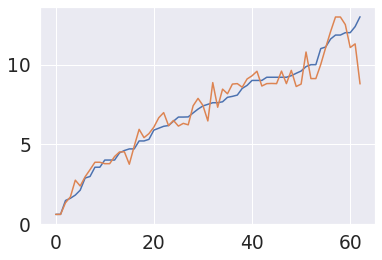

In [28]:
sorted_indices = y_train.argsort()
plt.plot(np.arange(y_train.shape[0]), y_train[sorted_indices])
plt.plot(np.arange(y_train.shape[0]), y_train_predict[sorted_indices])
plt.show()

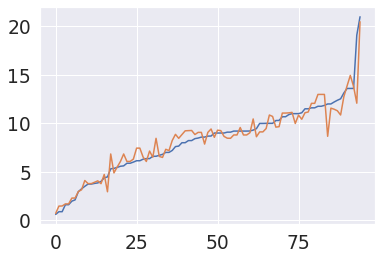

In [29]:
sorted_indices = y_test.argsort()
plt.plot(np.arange(y_test.shape[0]), y_test[sorted_indices])
plt.plot(np.arange(y_test.shape[0]), y_test_predict[sorted_indices])
plt.show()

In [30]:
y_test[sorted_indices][:10]

array([0.6 , 0.88, 0.88, 1.6 , 1.6 , 1.97, 2.1 , 2.95, 3.24, 3.5 ])

In [31]:
y_test_predict[sorted_indices][:10]

array([0.70446449, 1.457522  , 1.46955165, 1.68625259, 1.68625259,
       2.28781507, 2.28781507, 2.95829709, 3.14509031, 4.09960605])

In [32]:
model.fit(X_train, y_train).intercept_

-0.7648598982294992

### 6.4 Regression coefficients

In [33]:
model.fit(X_train, y_train).coef_

array([ 0.00956731, -0.13366282,  0.41017521,  0.79681459])

#### The regression coef is to show the percentage of each variable (column) in predicting the crew size in the model and from the coef i can categorical say that cabins have 80% chance of predicting the crew size compare to any other variable in the estimator.

### 7. Pearson correlation

In [34]:
per_cor_coef = np.corrcoef(X_train, X_test)
print(per_cor_coef)

[[1.         0.63069943 0.8961627  ... 0.596327   0.62141118 0.65350783]
 [0.63069943 1.         0.9094736  ... 0.99734192 0.99991162 0.99949599]
 [0.8961627  0.9094736  1.         ... 0.88897919 0.9043918  0.92150592]
 ...
 [0.596327   0.99734192 0.88897919 ... 1.         0.99810779 0.99493333]
 [0.62141118 0.99991162 0.9043918  ... 0.99810779 1.         0.99898819]
 [0.65350783 0.99949599 0.92150592 ... 0.99493333 0.99898819 1.        ]]


#### The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples. The correlation above show that there is a chance of finding a correlation  coefficient of 99% or even higher in a sample. 

## 8. Hyper-parameter tunning

#### Hyperparameters tunning are parameters estimates which improves the result of the linear regression model (Eg: increasing the percentage of train set/test set) and the variables which determine how the model is being trained Hyperparameters are set before training.

#### So in this case i will be decreasing the size of X_train and y_train, and decreasing the train set to 70% and 30% for test to improve the result of the linear regression model also increase the random_srate from range 1 to 10, scale the dataset using.

In [35]:
train_score = []
test_score = []

random_state = 10

for i in range(random_state):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.30, random_state = i)

    linear_model = LinearRegression()
    linear_model.fit(X_train1, y_train1)
    
    y_train_predict_mimax = linear_model.predict(X_train1)## predicting X train data set
    y_test_predict_minmax = linear_model.predict(X_test1)## predicting X test data set
    
    train_score = np.append(train_score, r2_score(y_train1, y_train_predict_mimax))
    test_score = np.append(test_score, r2_score(y_test1, y_test_predict_minmax))

print(X_train1.shape)## shape of X_train set
print(y_train1.shape)## shape of y_train set

(44, 4)
(44,)


In [36]:
train_score

array([0.93017602, 0.95904072, 0.92974471, 0.93971375, 0.97524973,
       0.92884048, 0.96349563, 0.92689857, 0.96682358, 0.91929053])

In [37]:
test_score

array([0.9225255 , 0.88837832, 0.95241532, 0.90266883, 0.74786232,
       0.87860908, 0.84067943, 0.94400723, 0.84149292, 0.96419586])

In [38]:
print('R2 train: %.2f +/- %.2f' % (np.mean(train_score),np.std(train_score)))
# print('mean_train_error_score: %.3f +/- %.3f' % (np.mean(mean_train_error_score),np.std(mean_train_error_score)))

R2 train: 0.94 +/- 0.02


In [39]:
print('R2 test: %.2f +/- %.2f' % (np.mean(test_score),np.std(test_score)))
# print('mean_test_error_score: %.3f +/- %.3f' % (np.mean(mean_test_error_score),np.std(mean_test_error_score)))

R2 test: 0.89 +/- 0.06


In [40]:
print("model score: % .2f" % linear_model.score(X_test1, y_test1))

model score:  0.96


### After reducing the train and test size as well as reducing the percentage of train and increasing the percentage of test there was a significant change in the accuracy score from 91% to 96%.

## 9. Regularization 

### Regularization is a technique used in Mechine Learning to regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. The regularization techniques that will be use are:
##   1. Lasso (L1)
##   2. Ridge (L2)

### 9.1 Lasso regularization regression

r2 train score: 0.94

r2 test score: 0.91

number of features used: 4.00


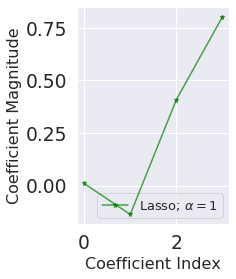

In [41]:
lasso = Lasso(alpha = 0.0, max_iter=100)

lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)

y_predict = lasso.predict(X_test)
test_score=lasso.score(X_test, y_test)

coeff_used = np.sum(lasso.coef_!=0)

print("r2 train score: %.2f" % train_score)
print()
print ("r2 test score: %.2f" % test_score)
print()
print ("number of features used: %.2f" % coeff_used)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,marker='*',markersize=5,color='green',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
# plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### 9.2 Ridge regularization regression

In [42]:
ridge = Ridge(alpha = 0.0, normalize = True)
ridge_reg = ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)
coeff_used = np.sum(ridge.coef_!=0)

print("R-square value: %.2f" % r2_score(y_test, y_predict))
print()
print("mean_square error: %.2f" % mean_squared_error(y_test, y_predict))
print()
print("number of coefficient used: %.2f" % coeff_used)
print()
print("ridge score: %.2f" % ridge.score(X_test, y_predict))
print()
print(ridge.coef_)

R-square value: 0.91

mean_square error: 1.14

number of coefficient used: 4.00

ridge score: 1.00

[ 0.00956731 -0.13366282  0.41017521  0.79681459]


### 9.3 lasso score

In [43]:
las= []
i = np.linspace(0.1, 1.0, 10)
for i in range(10):
    corr = Lasso(alpha=i)
    corr.fit(X,y)
    las_reg = corr.score(X_train,y_train)
    
    las.append(las_reg)
print(las)

[0.9354140480677716, 0.8513753484118916, 0.8321903425237327, 0.8318374428408712, 0.8313639354261229, 0.8307698202794875, 0.8300550974009653, 0.8292197667905561, 0.82826382844826, 0.8271872823740768]


### 10 Regularization and correlation (pearson)

In [44]:
alphas = []

corr_test = []
corr_train = []

train_scores = []
test_scores = []

alpha_iters = np.linspace(0.0, 1.0, 10)

for alpha in alpha_iters:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train,y_train)
    
    alphas.append(alpha)
    
    y_test_pred = ridge_model.predict(X_test)
    test_scores.append(ridge_model.score(X_test, y_test))
    corr_test.append(np.corrcoef(y_test, y_test_pred)[0,1])
    
    y_train_pred = ridge_model.predict(X_train)
    train_scores.append(ridge_model.score(X_train, y_train))
    corr_train.append(np.corrcoef(y_train, y_train_pred)[0,1])

### 10.1 Regularization parameter and Correlation values

In [45]:
corr_train = np.array(corr_train)
corr_test = np.array(corr_test)

z = list(zip(alphas, corr_test, corr_train, train_scores, test_scores))

print(f'{"alpha":^8s} | {"test_corr":^8s} | {"train_corr":^8s} | {"train_score":^8s} | {"test_score":^8s}')
print("="*60)
for (a, b, c, d, e) in z:
    print(f"{a:^8.2f} | {b:^9.2f} | {c:^10.2f} | {d:^11.2f} | {e:^10.2f}")

 alpha   | test_corr | train_corr | train_score | test_score
  0.00   |   0.96    |    0.97    |    0.94     |    0.91   
  0.11   |   0.96    |    0.97    |    0.94     |    0.91   
  0.22   |   0.96    |    0.97    |    0.94     |    0.91   
  0.33   |   0.96    |    0.97    |    0.94     |    0.91   
  0.44   |   0.96    |    0.97    |    0.94     |    0.91   
  0.56   |   0.96    |    0.97    |    0.94     |    0.91   
  0.67   |   0.96    |    0.97    |    0.94     |    0.91   
  0.78   |   0.96    |    0.97    |    0.94     |    0.91   
  0.89   |   0.96    |    0.97    |    0.94     |    0.91   
  1.00   |   0.96    |    0.97    |    0.94     |    0.91   


### 10.2 Visualization of Pearson correlation for train and test set

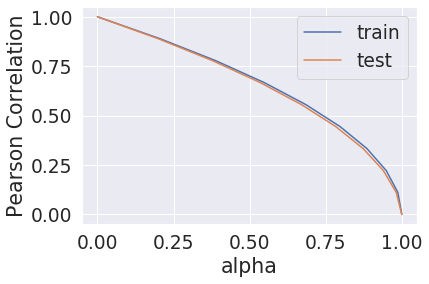

In [46]:
plt.plot((corr_train-corr_train.min()) / (corr_train.max() - corr_train.min()), alphas)
plt.plot((corr_test-corr_test.min()) / (corr_test.max()-corr_test.min()), alphas)
plt.ylabel('Pearson Correlation')
plt.xlabel('alpha')
plt.legend(["train", "test"])
plt.show()

## Visualization for pearson test correlation

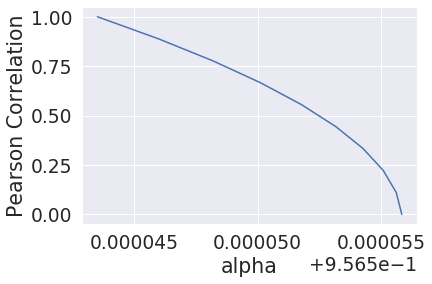

In [47]:
plt.plot(corr_test, alphas)
plt.xlabel('alpha')
plt.ylabel('Pearson Correlation')
plt.show()

## Visualization for pearson train correlation

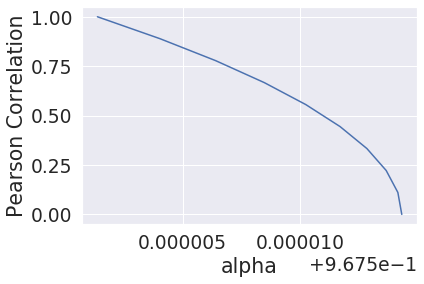

In [48]:
plt.plot( corr_train, alphas)
plt.xlabel('alpha')
plt.ylabel('Pearson Correlation')
plt.show()

# From the pearson correlation graph we observed that as the alpha value is increasing the train and test set is decreasing at almost same pace which mean that there is high correlation between the training and test set that is there is no trade off bias and variance meaning the model have high accuracy of predicting the crew size correctly as a result of learning from the training set.

### ==================================End of Notebook=======================================